# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

In [22]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [44]:
class single_layer_perceptron():
    def __init__(self, input_neurons=2, epoch=100, learning_rate=0.01):
        self.w = np.random.rand(input_neurons + 1) - 0.5
        self.learning_rate = learning_rate
        self.loss_history = []
        self.accuracy_history = []
        

    def predict(self, inputs):
        summation = np.dot(inputs, self.w[1:]) + self.w[0]
        # activation = 1.0 if (summation > 0.0) else 0.0
        activation = np.where(summation > 0.0, 1.0, 0.0)
        return activation
    
    def train(self, X, y, epochs=100):
        for EPOCH in range(epochs):
            fail_count = 0
            i = 0
            train_loss = 0
            predicted_labels = []

            for inputs, label in zip(X, y):
                i = i + 1
                prediction = self.predict(inputs)
                predicted_labels.append(prediction)

                if (label != prediction):
                    self.w[1:] += self.learning_rate * (label - prediction) * inputs.reshape(inputs.shape[0])
                    self.w[0] += self.learning_rate * (label - prediction)
                    fail_count += 1

                # Calculate loss = MSE = 1/N * (w'x - y)**2
                loss = ((prediction - label) ** 2).mean() / 100
                train_loss += loss

            # plt.cla()
            # plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', marker='.')

            line_x = np.arange(-10, 10, 0.1)
            line_y = (-self.w[0] - self.w[1] * line_x) / self.w[2]
            # plt.plot(line_x, line_y)
            # plt.xlim(-10, 10)
            # plt.ylim(-10, 10)
            # plt.text(-10, 10, 'epoch = {:2d}'.format(EPOCH), fontdict={'size': 14, 'color':  'black'})
            # plt.pause(0.01)

            # Calculate accuracy
            accuracy = (i - fail_count) / i

            self.loss_history.append(np.mean(train_loss))
            self.accuracy_history.append(np.mean(accuracy))

            # Calculate final predictions
            final_predictions = [self.predict(inputs) for inputs in X]
            
            # Create confusion matrix
            cm = confusion_matrix(y, final_predictions)

            print(f"Epoch: {EPOCH+1}, Loss: {np.mean(train_loss):.4f}, Accuracy: {np.mean(accuracy):.4f}")

            if (fail_count == 0):
                # plt.show()
                break

        plt.figure(figsize=(9, 7))
        x = np.arange(EPOCH + 1)
        plt.plot(x, self.loss_history, color='red', label='loss', alpha=0.3, marker='o')
        plt.title("Loss history")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        plt.figure(figsize=(9, 7))
        plt.plot(x, self.accuracy_history, color='blue', label='accuracy', alpha=0.3, marker='o')
        plt.title("Accuracy history")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        loss_history = np.array(self.loss_history)
        accuracy_history = np.array(self.accuracy_history)

        avg_loss = loss_history.mean()
        avg_accuracy = accuracy_history.mean()

        f1 = f1_score(y, predicted_labels)

        return self.w, f1, avg_loss, avg_accuracy
    


    def test(self, X, y):
        # Initialize variables
        total_loss = 0
        total_correct = 0
        predicted_labels = []

        # Iterate over all samples
        for inputs, label in zip(X, y):
            # Make a prediction
            prediction = self.predict(inputs)
            predicted_labels.append(prediction)

            # Calculate loss (MSE)
            loss = ((prediction - label) ** 2).mean()
            total_loss += loss

            # Check if prediction is correct
            if prediction == label:
                total_correct += 1

        # Calculate average loss and accuracy
        avg_loss = total_loss / len(X)
        accuracy = total_correct / len(X)

        # Calculate F1 score
        f1 = f1_score(y, predicted_labels)

        return np.mean(avg_loss), np.mean(accuracy), f1

In [45]:
# check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [46]:
# read dataset and remove first 8 row and set new header with this name: x, y, label
df = pd.read_csv("data.txt", skiprows=8, header=None, names=['x', 'y', "label"])
print("shape of data frame is:", df.shape)
print(df)


X = df[['x', 'y']]
y = df["label"]

shape of data frame is: (4500, 3)
             x         y  label
0     4.780310  2.698320      0
1    -2.273710  5.750180      0
2    -4.817170 -2.209610      0
3    -9.526940  0.659360      0
4     1.864400 -5.019510      0
...        ...       ...    ...
4495 -4.327500 -0.210256      1
4496 -1.077300  1.279540      1
4497 -2.377350 -3.078130      1
4498  0.508152  0.432983      1
4499 -0.641549 -1.355710      1

[4500 rows x 3 columns]


In [47]:
# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device).view(-1, 1)

In [48]:
# Split the dataset into training, testing, and validation sets
# Tranin: 70%, Test: 20%, Validation: 10%

X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

print("X training set size: {} and Y training set size: {}" .format(X_train.size(), y_train.size()))
print("X test set size: {} and Y test set size: {}" .format(X_test.size(), y_test.size()))
print("X validation set size: {} and Y validation set size: {}" .format(X_val.size(), y_val.size()))


X training set size: torch.Size([3150, 2]) and Y training set size: torch.Size([3150, 1])
X test set size: torch.Size([900, 2]) and Y test set size: torch.Size([900, 1])
X validation set size: torch.Size([450, 2]) and Y validation set size: torch.Size([450, 1])


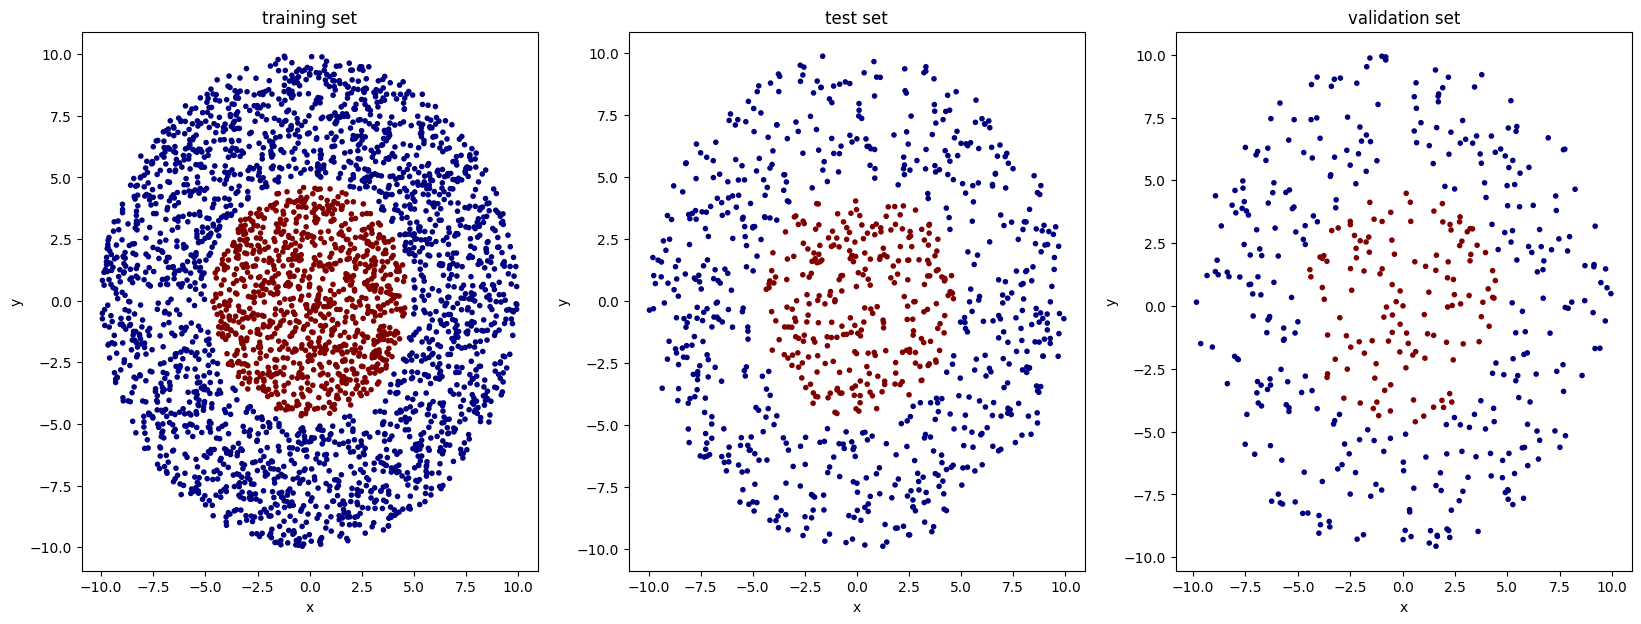

In [49]:
# plot dataset
plt.figure(figsize=(20, 7))

# plot training set
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0].cpu().numpy(), X_train[:, 1].cpu().numpy(), c=y_train.cpu().numpy(), cmap='jet', marker='.')
plt.title("training set")
plt.xlabel('x')
plt.ylabel('y')

# plot test set
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0].cpu().numpy(), X_test[:, 1].cpu().numpy(), c=y_test.cpu().numpy(), cmap='jet', marker='.')
plt.title("test set")
plt.xlabel('x')
plt.ylabel('y')

# plot validation set
plt.subplot(1, 3, 3)
plt.scatter(X_val[:, 0].cpu().numpy(), X_val[:, 1].cpu().numpy(), c=y_val.cpu().numpy(), cmap='jet', marker='.')
plt.title("validation set")
plt.xlabel('x')
plt.ylabel('y')


plt.show()

In [50]:
# set network parameters
num_of_inputs = 2
epochs = 5
learning_rate = 0.01
w = np.random.random(num_of_inputs + 1) - 0.5 # initial weights with random values between -0.5 and 0.5

Epoch: 1, Loss: 0.6500, Accuracy: 0.9856
Epoch: 2, Loss: 0.2900, Accuracy: 0.9936
Epoch: 3, Loss: 0.7100, Accuracy: 0.9842
Epoch: 4, Loss: 0.2900, Accuracy: 0.9936
Epoch: 5, Loss: 0.7200, Accuracy: 0.9840


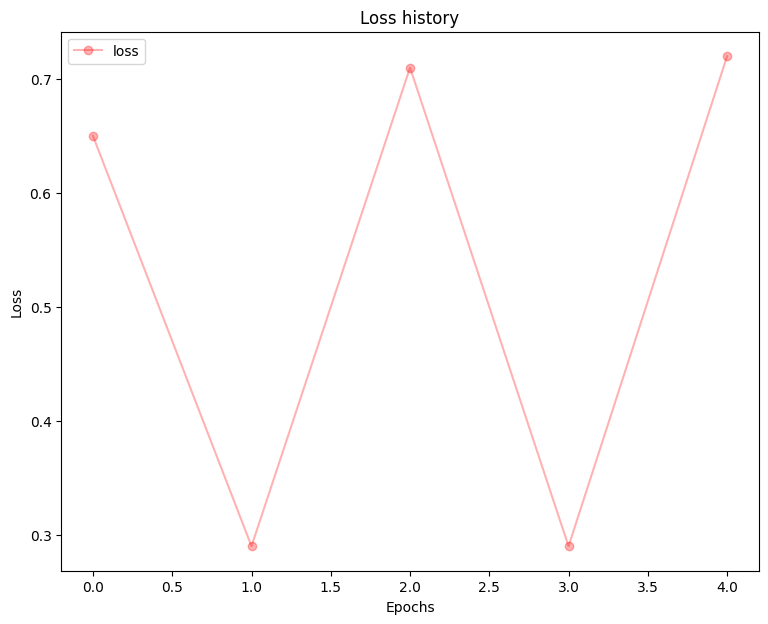

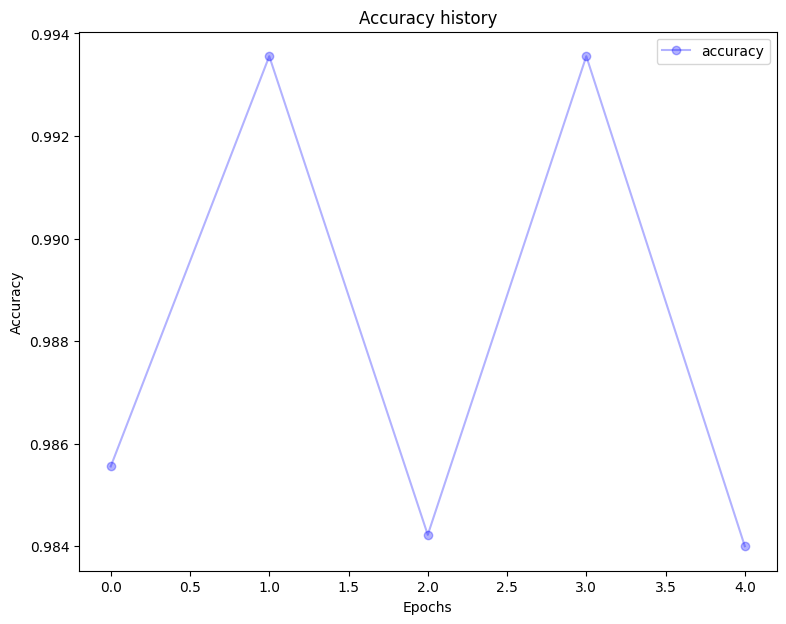

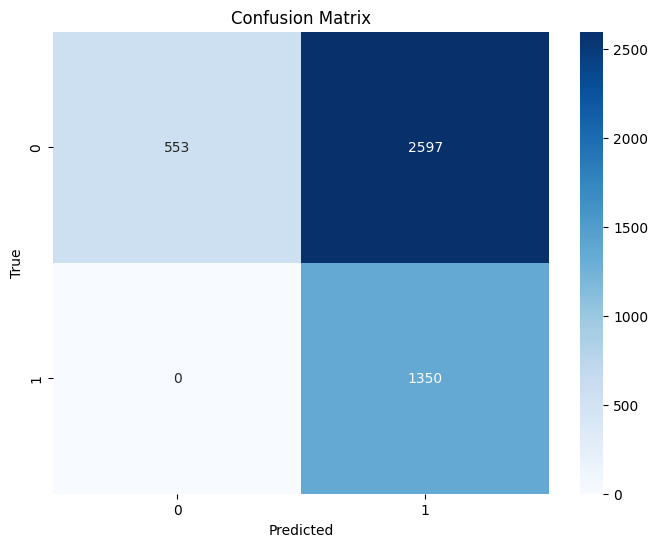

In [51]:
perceptron = single_layer_perceptron(num_of_inputs, epochs, learning_rate)

# Train phase
new_weight, F1_score, avg_loss, avg_acc = perceptron.train(X_tensor.cpu().numpy(), y_tensor.cpu().numpy(), epochs)
print(f"Average loss: {avg_loss:.4f}, Average accuracy: {avg_acc:.4f}, F1 score: {F1_score:.4f}")

In [52]:
# Test phase
# Test with validation set
val_loss, val_accuracy, val_f1 = perceptron.test(X_val.cpu().numpy(), y_val.cpu().numpy())
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Val F1: {val_f1:.4f}")

# Test with test set
test_loss, test_accuracy, test_f1 = perceptron.test(X_test.cpu().numpy(), y_test.cpu().numpy())
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f}")

Validation Loss: 0.6133, Validation Accuracy: 0.3867, Val F1: 0.4713
Test Loss: 0.5622, Test Accuracy: 0.4378, Test F1: 0.5199
